The objective of this project is to perform linear regression analysis (ordinary least square technique) using Python Statsmodels to predict the car price, based on the automobile dataset from [UCI Machine Learning repository](https://archive.ics.uci.edu/ml/datasets/automobile), which is a common dataset for regression analysis. The automobile dataset is from the year 1985 which is quite old, but it's suitable for the learning purposes of this project.
<br/>
You can find the project's jupyter notebook and the dataset (if you want to skip extracting step) on my [GitHub repository](https://github.com/mohammad-agus/linear_regression_ordinary_least_square).

### Import Library

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt

from urllib import request # download dataset description from the source

import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing & Exploration

### Exctract the Dataset

* Download and read the dataset description

In [144]:
data_desc_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names"
response = request.urlretrieve(data_desc_url, "dataset/data_desc.names")

with open("dataset/data_desc.names") as data_desc:
    print(data_desc.read())

1. Title: 1985 Auto Imports Database

2. Source Information:
   -- Creator/Donor: Jeffrey C. Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
   -- Date: 19 May 1987
   -- Sources:
     1) 1985 Model Import Car and Truck Specifications, 1985 Ward's
        Automotive Yearbook.
     2) Personal Auto Manuals, Insurance Services Office, 160 Water
        Street, New York, NY 10038 
     3) Insurance Collision Report, Insurance Institute for Highway
        Safety, Watergate 600, Washington, DC 20037

3. Past Usage:
   -- Kibler,~D., Aha,~D.~W., \& Albert,~M. (1989).  Instance-based prediction
      of real-valued attributes.  {\it Computational Intelligence}, {\it 5},
      51--57.
	 -- Predicted price of car using all numeric and Boolean attributes
	 -- Method: an instance-based learning (IBL) algorithm derived from a
	    localized k-nearest neighbor algorithm.  Compared with a
	    linear regression prediction...so all instances
	    with missing attribute values were discarded.  This res

* Read the dataset and assign the column header

In [205]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data" # url source dataset
df = pd.read_csv(data_url)
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


As shown above, the dataset doesn't contain the column header. Here is the column list that has been created manually based on the dataset descriptions.

In [206]:
column = [  'symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
            'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base',
            'length', 'width', 'height', 'curbweight', 'engine-type', 'num-of-cylinders',
            'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 
            'peak-rpm', 'city-mpg', 'highway-mpg', 'price' ]

data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df.columns = column
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


### Data Cleaning

* Check the null value
<br/>
The null values denoted by '?' sign

In [207]:
print(df.shape)
print(df.isin(['?']).sum())

(204, 26)
symboling             0
normalized-losses    40
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curbweight            0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


* Handle the missing values
<br/> All the null values will be removed, starting with normalized-losses column (otherwise all 40 rows will be removed) along with the symboling column because there is no enough information about this feature. For the rest of the missing values, replace '?' sign with a null value (numpy.nan) then perform dropna().

In [208]:
df.drop(['normalized-losses','symboling'], axis=1, inplace=True)
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
df.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [209]:
df.shape

(192, 24)

After the null values were removed, now the dataset consist of 192 rows and 24 features (columns).

* Check the data type of df dataset columns

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 203
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               192 non-null    object 
 1   fuel-type          192 non-null    object 
 2   aspiration         192 non-null    object 
 3   num-of-doors       192 non-null    object 
 4   body-style         192 non-null    object 
 5   drive-wheels       192 non-null    object 
 6   engine-location    192 non-null    object 
 7   wheel-base         192 non-null    float64
 8   length             192 non-null    float64
 9   width              192 non-null    float64
 10  height             192 non-null    float64
 11  curbweight         192 non-null    int64  
 12  engine-type        192 non-null    object 
 13  num-of-cylinders   192 non-null    object 
 14  engine-size        192 non-null    int64  
 15  fuel-system        192 non-null    object 
 16  bore               192 non

The df.info() shows that there are some columns hasn't have the correct data type

* Convert the columns datatype

In [211]:
# to float
to_float = ['bore', 'stroke', 'horsepower', 'peak-rpm', 'price']

for i in to_float:
    df[i] = df[i].astype(float)
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 203
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               192 non-null    object 
 1   fuel-type          192 non-null    object 
 2   aspiration         192 non-null    object 
 3   num-of-doors       192 non-null    object 
 4   body-style         192 non-null    object 
 5   drive-wheels       192 non-null    object 
 6   engine-location    192 non-null    object 
 7   wheel-base         192 non-null    float64
 8   length             192 non-null    float64
 9   width              192 non-null    float64
 10  height             192 non-null    float64
 11  curbweight         192 non-null    int64  
 12  engine-type        192 non-null    object 
 13  num-of-cylinders   192 non-null    object 
 14  engine-size        192 non-null    int64  
 15  fuel-system        192 non-null    object 
 16  bore               192 non

Now, the columns have the correct data type and it's ready for some calculations

* Histogram of the Car Price
<br/>
The value that will be predicted (Price) is called the Target or Dependent Variable and the predictor is called the Features or Independent Variables.

<Figure size 864x576 with 0 Axes>

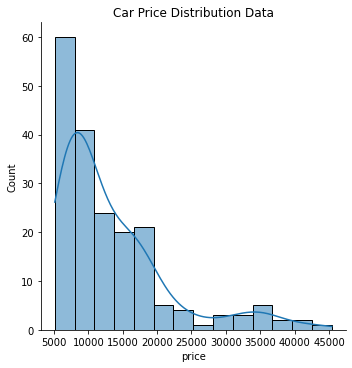

In [212]:
plt.figure(figsize=(12,8))
sns.displot(df['price'], kde=True)
plt.title('Car Price Distribution Data')
plt.show()

As shown in the plot above, most of the car prices are concentrated between the range 5000 to 20000 and the data has right-skewed distribution.

* Price range based on categorical variables

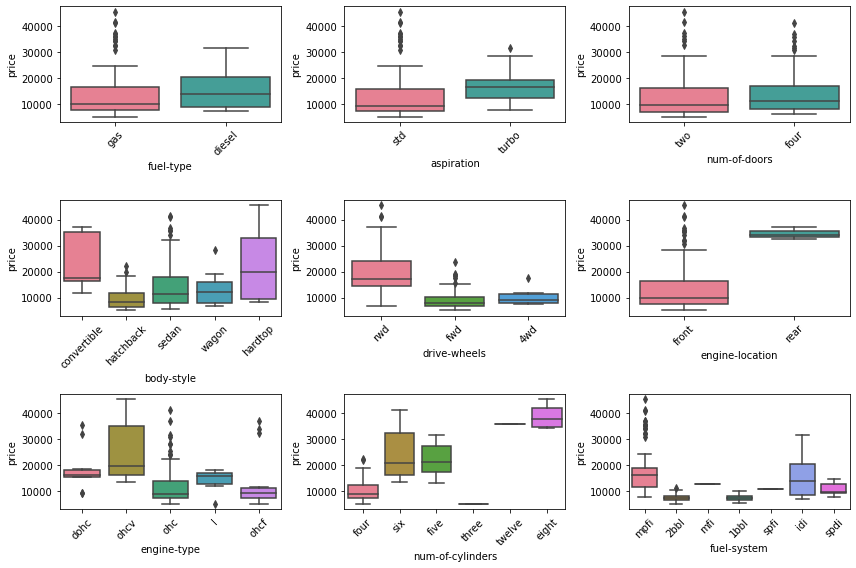

In [213]:
cat_var = df.loc[: , df.columns!='make'].select_dtypes(include=['object'])

plt.figure(figsize=(12,8))
for i in enumerate(cat_var.columns): # enumerate(df.columns): return list of tuple(index column, name of column)
    plt.subplot(3,3, i[0]+1) # 3 rows, 3 columns, index enumerate() + 1
    sns.boxplot(data=df,  x=i[1], y='price', palette="husl") # x: name of the column
    plt.xticks(rotation = 45)
    plt.tight_layout()

There are some outliers data based on the plots, but it's permissible for several reasons. Their occurrence is natural and the error can't be identified or corrected. So in this step, the outliers won't be removed.

* Summary of the numerical value

In [214]:
num_var = df.loc[: , df.columns!='make'].select_dtypes(include=['float','int64'])
num_var.describe() # or df.describe

,wheel-base,length,width,height,curbweight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,98.977604,174.355208,65.903125,53.896354,2561.578125,128.114583,3.329896,3.251823,10.149583,103.442708,5100.260417,25.348958,30.807292,13283.932292
std,6.122858,12.504792,2.139431,2.372693,528.076113,41.698963,0.272909,0.313541,3.987026,38.055441,469.864005,6.396833,6.829207,8110.216546
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.075000,52.000000,2143.750000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.000000,25.000000,7725.750000
50%,97.100000,173.200000,65.450000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10221.500000
75%,102.400000,184.600000,66.900000,55.700000,2952.500000,146.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.500000,16525.750000
max,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


* Plot a heatmap based on the correlation value of each numerical variables

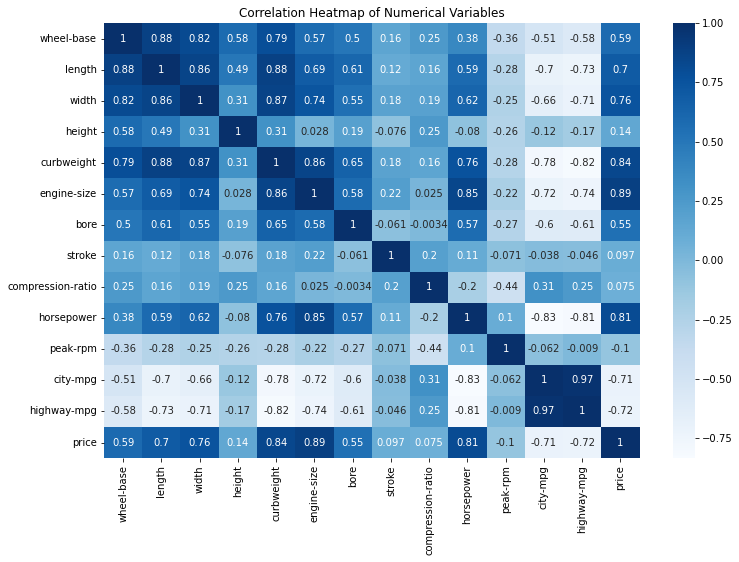

In [215]:
plt.figure(figsize=(12,8))
sns.heatmap(num_var.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

Based on the heatmap, several variables have strong positive or negative correlations. In the simple linear regression analysis, engine-size will be used as the predictor. Then, all the categorical and numerical variables that have been explored before, will be used in the multiple linear regression analysis as well.

# Simple Linear Regression

* Scatter plot and histogram (joint plot) of engine-size vs price

<Figure size 864x576 with 0 Axes>

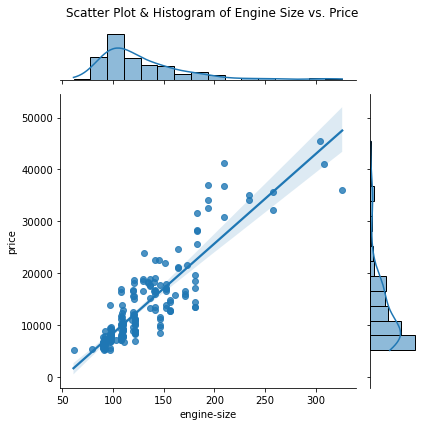

In [386]:
plt.figure(figsize=(12,8))
sns.jointplot(data=df, x='engine-size', y='price', kind='reg').fig.suptitle("Scatter Plot & Histogram of Engine Size vs. Price")
plt.tight_layout()
plt.show()

* Duplicate df dataframe and randomly return the sample of the dataframe
<br/>
Parameter frac=1 means 100% of the dataframe will return randomly and the random_state parameter is for reproducibility (similar to random seed in numpy).

In [387]:
df_slr = df.copy() # slr: simple linear regression
df_slr = df_slr.sample(frac=1, random_state=101).reset_index(drop=True)

df_slr.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,mazda,gas,std,four,sedan,fwd,front,93.1,166.8,64.2,...,91,2bbl,3.03,3.15,9.0,68.0,5000.0,31,38,6695.0
1,toyota,gas,std,four,sedan,fwd,front,102.4,175.6,66.5,...,122,mpfi,3.31,3.54,8.7,92.0,4200.0,29,34,8948.0
2,nissan,gas,std,two,hatchback,fwd,front,94.5,165.6,63.8,...,97,2bbl,3.15,3.29,9.4,69.0,5200.0,31,37,7799.0
3,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,...,92,1bbl,2.91,3.41,9.2,76.0,6000.0,30,34,7129.0
4,plymouth,gas,std,four,wagon,fwd,front,103.3,174.6,64.6,...,122,2bbl,3.35,3.46,8.5,88.0,5000.0,24,30,8921.0


* Assign engine-size as the feature (x) and price as the target (y)

In [388]:
x_slr = df_slr['engine-size']
y_slr = df_slr['price']

* Add constant (represent of intercept) to x variable (where y = a + bx)

In [389]:
x_slr = sm.add_constant(x_slr)
x_slr.head()

,const,engine-size
0,1.0,91
1,1.0,122
2,1.0,97
3,1.0,92
4,1.0,122


* Split data into a training set and testing set
<br/>
Split 75% of the data into a training set and 25% for testing the model. Scikit-learn library has the same function for this kind of task (model_selection.train_test_split).

In [390]:
train_size = int(0.75 * len(x_slr))

x_train_slr = x_slr[:train_size]
y_train_slr = y_slr[:train_size]

x_test_slr = x_slr[train_size:]
y_test_slr = y_slr[train_size:]

x_train_slr.shape, x_test_slr.shape

((144, 2), (48, 2))

* Fit linear regression model and view the summary

In [393]:
lm_slr = sm.OLS(y_train_slr, x_train_slr).fit()

lm_slr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     539.4
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           3.28e-50
Time:                        23:10:11   Log-Likelihood:                -1384.0
No. Observations:                 144   AIC:                             2772.
Df Residuals:                     142   BIC:                             2778.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.001e+04   1036.836     -9.658      0.000   -1.21e+04   -7964.340
engine-size   181.8057      7.828     23.225      0.000     166.331     197.280
==============================================================================
Omnibus:                       14.699   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               25.391
Skew:                           0.482   Prob(JB):                     3.06e-06
Kurtosis:                       4.817   Cond. No.                         453.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* The model's R-squared is 0.792 or 79.2%, indicating that the linear model is reasonably effective in predicting price, given that it utilizes only one feature. This value signifies that the model captured 79.2% of the variance in the underlying data.

* The F-statistic and corresponding P-value evaluate the validity of the regression analysis in its entirety. A P-value less than 5% indicates the analysis is valid. The null hypothesis for this test is that all regression coefficients equal zero, which is not the case in this scenario. Therefore, the null hypothesis can be rejected, and the alternative hypothesis that regression coefficients are not equal to zero can be accepted.

* For each regression coefficient, a P-statistic and corresponding P-value quantify the precision and validity of the coefficient. The P-values of 0.000 for the intercept and 0.000 for the enginesize coefficient demonstrate their validity. The T-statistic and P-value confirm the statistical significance of the relationship between enginesize and price. In this simple linear regression, the coefficient of engine-size predictor is 181.8057, which means a 1 unit increase in engine-size will be adding 181.8057 to the car price.

* Plot the linear regression model using

eval_env: 1


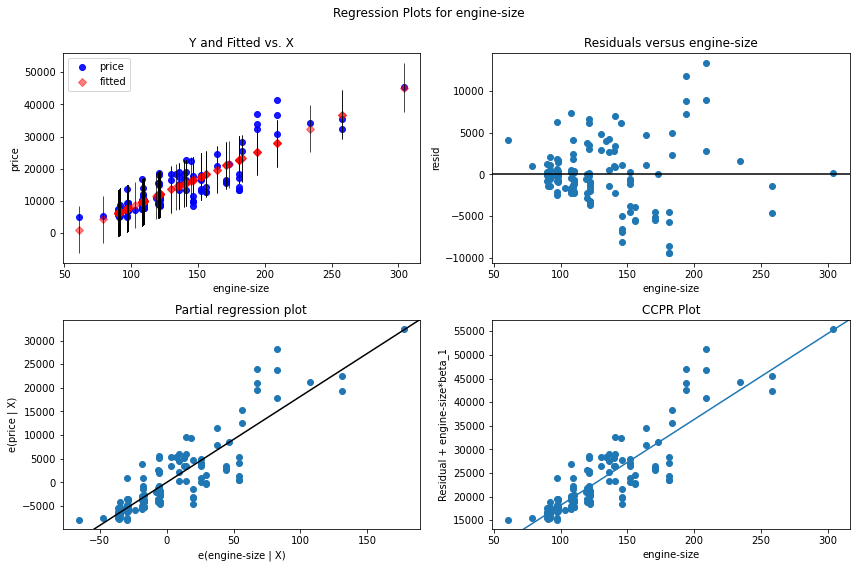

In [394]:
fig = plt.figure(figsize=(12,8))

fig = sm.graphics.plot_regress_exog(lm_slr, 'engine-size', fig=fig)

plt.show()

The statsmodels' plot_regress_exog function allows for viewing regression results against a single regressor, which in this case is enginesize. Four different plots are generated by this function:

* The upper-left ('Y and Fitted vs. X') plot displays the fitted values of the regression line (in red) versus the actual values of enginesize and price, with vertical lines representing prediction confidence intervals for each fitted value.
* The second plot, showing the residuals of the regression versus the predictor variable (enginesize), can help identify any non-linear patterns. If residuals are evenly spread out around the 0 line, it indicates that the regression model does not have any non-linear patterns.
* The Partial regression plot is used to demonstrate the effect of adding an independent variable to a model that already has one or more independent variables. As this is a single-variable model, the Partial regression plot simply displays a scatter plot of price versus horsepower with a fitted regression line.
* Lastly, the CCPR (Component-Component Plus Residual) plot allows for assessing the impact of one regressor (enginesize) on the response variable (price) while accounting for the effects of other independent variables. In this case, as there are no other independent variables in this regression, the plot simply shows a scatter plot with a linear model fit on the data.

* Influence plot of the linear regression model

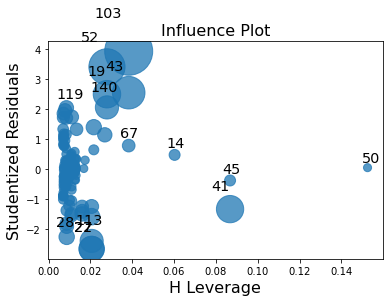

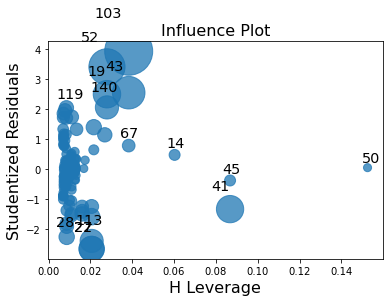

In [395]:
sm.graphics.influence_plot(lm_slr)

The influence_plot can be utilized to gain a deeper understanding of the regression model. This plot enables the identification of records in the dataset that have had a significant influence on the regression analysis. The influential data points can be recognized by their large circles in the plot. For example, the data point with ID 103 has a significant impact on the regression results.

* Predict the testing data using the model

In [396]:
y_pred_slr = lm_slr.predict(x_test_slr)

y_pred_slr.head()

144     7802.991688
145    12166.328913
146    18347.723315
147     9984.660300
148    11802.717477
dtype: float64

* Plot the the test value and the corresponding predicted value

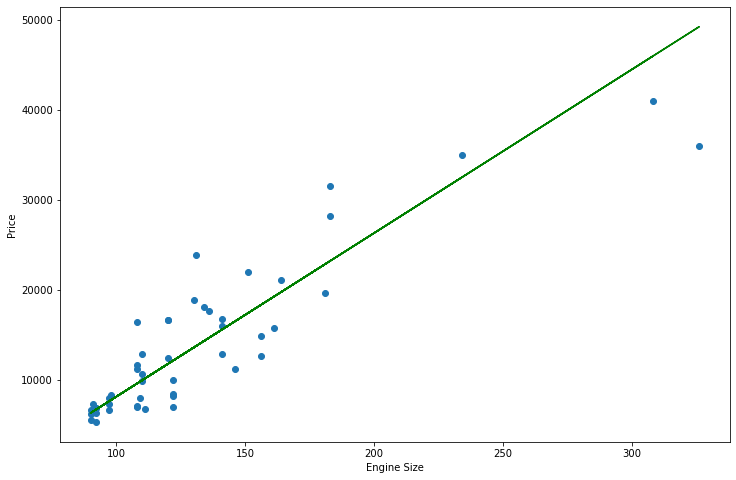

In [397]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(x_test_slr['engine-size'], y_test_slr)
plt.plot(x_test_slr['engine-size'], y_pred_slr, color='g')

plt.xlabel('Engine Size')
plt.ylabel('Price')

plt.show()

The fitted line of the predicted values can be seen here. Here is a scatter plot of the test data (engine size vs. price) and the matching predicted value for each x value in the test data. It appears to have quite accurately approximated or fitted the test data.

In [398]:
from sklearn.metrics import r2_score

r2_score(y_test_slr, y_pred_slr)

0.7754738656907856

The R-squared score (in Bahasa Indonesia: "Koefisien Determinasi") from statsmodels and sklearn is slightly different which is 0.792 and 0.775. The values can differ because the R-squared value was derived using a number of different formulas, but it's not a significantly differ because of the models and datasets are the same.

# Multiple Linear Regression

* Duplicate the df dataframe and show the columns of the duplicated dataframe

In [399]:
df_mlr = df.copy() # mlr: multiple linear regression
df_mlr.columns

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curbweight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

* Create a list that contains only two unique values and perform the label encoding
<br/>
Some of the variables in this linear regression analysis are the pre-determined values that are categorical. So to use these variables as predictors, it has to be encoded or converted to numeric values in binary form. It will be using the LabelEncoder from the scikit‑learn library. To every discrete value that these variables take on, the label and quota will assign a unique integral value. For example, gas might be 0, and fuel-type diesel will be 1.

In [400]:
cols = ['fuel-type','aspiration','num-of-doors','engine-location']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in cols:
    df_mlr[i] = le.fit_transform(df_mlr[i])
    
df_mlr[cols].sample(5) # similar to DataFrame.head() but it returning the data randomly

,fuel-type,aspiration,num-of-doors,engine-location
125,1,0,1,1
7,1,1,0,0
3,1,0,0,0
98,1,0,0,0
177,1,0,1,0


* Perform 'one-hot' encoding to other categorical variables
<br/>
One‑hot encoding is a converting process to represent categorical variables in numeric form (such as the previous one). One‑hot encoding will replace the original column with a new column, one corresponding to each category value. So there will be a column for convertible, a column for sedan, a column for hatchback, and so on. A value of 1 will indicate that the car belongs to that category. A value of 0 indicates the car does not belong to a category. This one‑hot encoding will be using pd.get_dummies. Then remove the original columns using the DataFrame.drop function.

In [401]:
df_mlr.drop(['make'], axis=1, inplace=True)
cat_columns = ['body-style', 'engine-type', 'drive-wheels', 'num-of-cylinders', 'fuel-system']
for i in cat_columns:
    df_mlr = pd.concat([df_mlr.drop(i, axis=1),
                        pd.get_dummies(df_mlr[i],
                                        prefix = i,
                                        prefix_sep = '_',
                                        drop_first = True)], axis=1)

df_mlr.head()

,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curbweight,engine-size,...,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,1,0,1,0,88.6,168.8,64.1,48.8,2548,130,...,1,0,0,0,0,0,0,1,0,0
1,1,0,1,0,94.5,171.2,65.5,52.4,2823,152,...,0,1,0,0,0,0,0,1,0,0
2,1,0,0,0,99.8,176.6,66.2,54.3,2337,109,...,1,0,0,0,0,0,0,1,0,0
3,1,0,0,0,99.4,176.6,66.4,54.3,2824,136,...,0,0,0,0,0,0,0,1,0,0
4,1,0,1,0,99.8,177.3,66.3,53.1,2507,136,...,0,0,0,0,0,0,0,1,0,0


In [402]:
df_mlr.shape # get the number of rows and columns

(192, 39)

* Duplicate the dataframe, assign it into features and target, then add constant

In [408]:
df_mlr = df_mlr.sample(frac=1, random_state=101).reset_index(drop=True) # copy the dataframe

x_mlr = df_mlr.drop(['price'], axis=1) # assign df_mlr into the x variables (exclude price variable)
y_mlr = df_mlr['price'] # assign df_mlr['price'] as the target
x_mlr = sm.add_constant(x_mlr) # add constant

x_mlr.head()

,const,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curbweight,...,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,1.0,1,0,0,0,95.7,166.3,64.4,53.0,2094,...,1,0,0,0,1,0,0,0,0,0
1,1.0,1,0,0,0,96.3,172.4,65.4,51.6,2405,...,1,0,0,0,1,0,0,0,0,0
2,1.0,1,0,1,0,93.7,156.9,63.4,53.7,2050,...,1,0,0,0,1,0,0,0,0,0
3,1.0,0,0,0,0,95.7,166.3,64.4,52.8,2275,...,1,0,0,0,0,1,0,0,0,0
4,1.0,1,0,0,0,100.4,184.6,66.5,56.1,3296,...,0,1,0,0,0,0,0,1,0,0


* Split the features and the target into train and test set

In [409]:
train_size = int(0.75 * len(x_mlr))

x_train_mlr = x_mlr[:train_size]
y_train_mlr = y_mlr[:train_size]

x_test_mlr = x_mlr[train_size:]
y_test_mlr = y_mlr[train_size:]

* Fit the linear model

In [410]:
lm_mlr = sm.OLS(y_train_mlr, x_train_mlr).fit()

lm_mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     64.34
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           1.37e-57
Time:                        23:11:20   Log-Likelihood:                -1270.9
No. Observations:                 144   AIC:                             2616.
Df Residuals:                     107   BIC:                             2726.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -9411.3321   1.22e+04     -0.770      0.443   -3.37e+04    1.48e+04
fuel-type               -9246.4332   6086.817     -1.519      0.132   -2.13e+04    2819.971
aspiration               3277.5263   1011.705      3.240      0.002    1271.938    5283.114
num-of-doors              392.3527    567.431      0.691      0.491    -732.513    1517.219
engine-location          9642.3138   3247.553      2.969      0.004    3204.418    1.61e+04
wheel-base                 99.6793    105.995      0.940      0.349    -110.443     309.802
length                    -13.5839     56.281     -0.241      0.810    -125.154      97.986
width                     559.9362    262.374      2.134      0.035      39.810    1080.063
height                     45.0751    134.942      0.334      0.739    -222.432     312.582
curbweight                  3.4769      1.735      2.004      0.048       0.037       6.916
engine-size               187.9631     33.757      5.568      0.000     121.044     254.882
bore                    -8081.4563   2946.756     -2.742      0.007   -1.39e+04   -2239.855
stroke                  -7410.3141   1345.711     -5.507      0.000   -1.01e+04   -4742.599
compression-ratio        -725.6049    550.743     -1.318      0.190   -1817.390     366.180
horsepower                  4.1445     30.218      0.137      0.891     -55.759      64.048
peak-rpm                    1.7939      0.656      2.735      0.007       0.494       3.094
city-mpg                 -137.0491    148.027     -0.926      0.357    -430.496     156.398
highway-mpg               150.5873    130.822      1.151      0.252    -108.751     409.926
body-style_hardtop      -2942.3803   1577.377     -1.865      0.065   -6069.347     184.586
body-style_hatchback    -3394.3689   1357.457     -2.501      0.014   -6085.368    -703.369
body-style_sedan        -2550.8160   1436.284     -1.776      0.079   -5398.082     296.450
body-style_wagon        -3831.4155   1580.835     -2.424      0.017   -6965.237    -697.594
engine-type_l            -930.7077   1699.824     -0.548      0.585   -4300.411    2438.996
engine-type_ohc          4116.5248   1036.005      3.973      0.000    2062.767    6170.283
engine-type_ohcf         2489.0863   1957.928      1.271      0.206   -1392.277    6370.449
engine-type_ohcv        -5227.0384   1435.238     -3.642      0.000   -8072.230   -2381.847
drive-wheels_fwd          582.7521   1346.993      0.433      0.666   -2087.505    3253.009
drive-wheels_rwd         1033.7994   1615.265      0.640      0.524   -2168.275    4235.873
num-of-cylinders_five   -3875.2180   3427.628     -1.131      0.261   -1.07e+04    2919.655
num-of-cylinders_four   -1629.2153   4163.469     -0.391      0.696   -9882.806    6624.376
num-of-cylinders_six    -3337.5451   2609.552  

The R‑squared score has increased from 0.792 to 0.956 (95.6%) and the adjusted R-squared score is 0.941. In multiple linear regression, it's necessary to evaluate the adjusted R-squared because not all the predictors are relevant and the adjusted R-squared applies penalty calculations to the irrelevant variables that are included in the regression analysis. The score of R-squared and the adjusted R-squared is slightly different, this indicates there is an irrelevant predictor in this model. Below the adjusted R-squared there are the F-statistics and the corresponding p-value for the analysis. The p‑value is under the significant threshold of 5% indicating that this is a valid regression analysis.
<br/>
Each predictor in this model has a coefficient of regression, t-statistic, and p-value that indicates the validity of that regression coefficient. Take a look at the p-value of engine-size coefficient which is 0. The null hypothesis for this statistical test is that this coefficient has no impact or effect on the regression. The alternative hypothesis is that this coefficient has an impact or effect on the regression. With the p‑value of 0, the alternative hypothesis is accepted if the p-value is under the significance threshold (0.05 or 5%). All the predictor's coefficient that has the corresponding p-value above the significance threshold doesn't have effects on this regression, so it's considered irrelevant predictors in this linear regression model.

* Predicting the testing data

In [418]:
y_pred_mlr = lm_mlr.predict(x_test_mlr)

y_pred_mlr.head()

144    19234.625968
145    12312.748702
146     7764.831375
147    22805.878204
148    31185.952371
dtype: float64

* Create a dataframe to plot the test target values and the predicted values

In [425]:
data_actual_pred = pd.DataFrame({'Actual Value' : y_test_mlr.ravel(),
                                 'Predicted Value' : y_pred_mlr})

data_actual_pred.head()

,Actual Value,Predicted Value
144,16695.0,19234.625968
145,18344.0,12312.748702
146,8238.0,7764.831375
147,19045.0,22805.878204
148,41315.0,31185.952371


* Transform (unpivot) data_actual_pred dataframe into a suitable form for plotting

In [426]:
melted_data_actual_pred = pd.melt(data_actual_pred.reset_index(),
                                   id_vars=['index'],
                                   value_vars=['Actual Value', 'Predicted Value'])

,index,variable,value
0,144,Actual Value,16695.0
1,145,Actual Value,18344.0
2,146,Actual Value,8238.0
3,147,Actual Value,19045.0
4,148,Actual Value,41315.0


* Create a comparison lineplot of the actual value vs. the predicted value

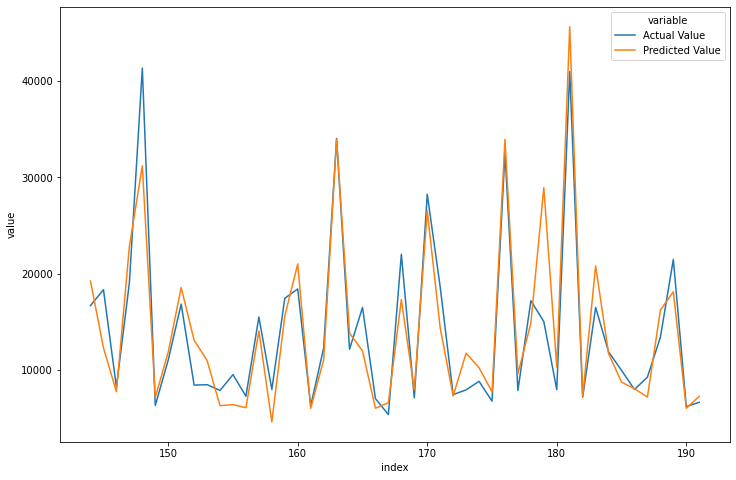

In [424]:
plt.figure(figsize=(12,8))
sns.lineplot(data=melted_data_actual_pred, x='index', y='value', hue='variable')

plt.show()

The plot shows the actual and the predicted values are close. It indicates this is a good model.

* Calculate R-squared using sklearn.metrics

In [420]:
from sklearn.metrics import r2_score

r2_score(y_test_mlr, y_pred_mlr)

0.8394132007351216

As explained before, the statsmodels's and sklearn's R-squared scores might be slightly different due to different calculations, and it's not a big problem. According to Chin (1998), the R-squared score that more than 0.67 is categorized as a substantial. Therefore, the closer the R-squared value is to 1, the better the fit of the model.

# Credits
* Janani Ravi, for providing a clear and insightful explanation of linear regression in the course "Foundations of Statistics and Probability for Machine Learning" on [Pluralsight](https://app.pluralsight.com/library/courses/foundations-statistics-probability-machine-learning/table-of-contents). Janani Ravi's explanation was a valuable resource in the development of this article.
* Chin, W. W. (1998). [The Partial Least Squares Aproach to Structural Equation Modeling. Modern Methods for Business Research](https://www.researchgate.net/publication/311766005_The_Partial_Least_Squares_Approach_to_Structural_Equation_Modeling), 295, 336